# `geopandas`: analyze spatial data

In [1]:
import geopandas

## Import from URL

https://www.opendataphilly.org/group/transportation-group

In [2]:
# vision zero high injury network 
url = "https://phl.carto.com/api/v2/sql?filename=high_injury_network_2020&format=geojson&skipfields=cartodb_id&q=SELECT+*+FROM+high_injury_network_2020"

Use `geopandas.read_file()` to access GIS data

In [3]:
gdf = geopandas.read_file(url)

The new geodataframe has all the features of a dataframe, plus some extra ones.

For example `.plot()` will show a quick map view of the data if you have `matplotlib` installed.

<AxesSubplot:>

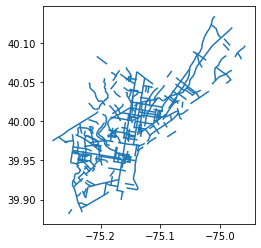

In [4]:
gdf.plot()

In [5]:
gdf.head()

,objectid,street_name,buffer,geometry
0,1,ROOSEVELT BLVD,150 feet,"LINESTRING (-75.14365 40.01976, -75.14334 40.0..."
1,2,WOODHAVEN RD,150 feet,"LINESTRING (-74.97231 40.08794, -74.97145 40.0..."
2,3,WOODHAVEN RD,150 feet,"LINESTRING (-74.99380 40.10553, -74.98914 40.1..."
3,4,10TH ST,50 feet,"LINESTRING (-75.15685 39.95104, -75.15673 39.9..."
4,5,11TH ST,50 feet,"LINESTRING (-75.15961 39.94576, -75.15948 39.9..."


## Manipulate Projection

You can project the spatial data to a new EPSG with the `.to_crs()` function:

In [6]:
gdf = gdf.to_crs(epsg=2272)
gdf.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Geoprocessing

You can leverage the `.geometry` of the geodataframe for spatial analysis. In the example below we're extracting the buffer distance as an integer from the `buffer` column, and then we're buffering the line features by the buffer size.

In [7]:
# Make a copy of the linestring data

buffered = gdf.copy()

In [8]:
# "buffer" column has values like '150 feet'
# this line of code extracts the number '150' from the text
# and saves it into a new column named 'buff_feet'

buffered["buff_feet"] = buffered["buffer"].str.split(expand=True)[0]

In [9]:
# This code block defines a function that works on a single row

def buffer(row):
    """If buff_feet is not none, use that value.
       Otherwise, assume a buffer distance of 250
    
        Return a buffered geometry using the value.
    """
    if row.buff_feet:
        value = int(row.buff_feet)
    else:
        value = 250

    return row.geometry.buffer(value)


# Using the .apply() function we can run the row-wise function against all rows
buffered['geometry'] = buffered.apply(buffer, axis=1)

## Visualize Results

The two cells below show the geometric shapes of the raw data and buffer (respectively) for the second row in the dataset.

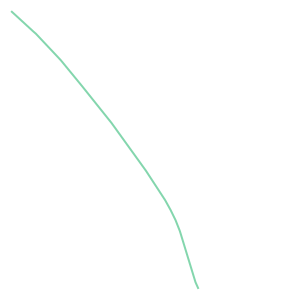

In [10]:
# LineString geometry

gdf.iloc[1].geometry

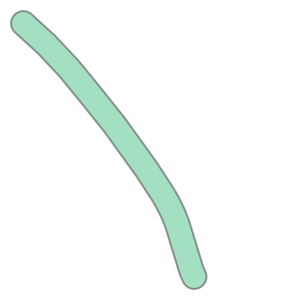

In [11]:
# Polygon geometry

buffered.iloc[1].geometry